## **1. Data Collection and Handling**

In [1]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

Saving DATAs.csv to DATAs.csv


In [9]:
data= pd.read_csv('DATAs.csv')
data.head()

,Polymer,Substrate,Dosage [ppm],Adsorption [mg/m2],pH,MW
0,PAM,Silica,0.0010,0.086,6,17000
1,PAM,Silica,0.0030,0.213,6,17000
2,PAM,Silica,0.0270,0.239,6,17000
3,PAM,Silica,0.0051,0.260,6,17000
4,PAM,Silica,0.0082,0.256,6,17000


In [11]:
y=data['Dosage [ppm]']


In [10]:
x=data['Adsorption [mg/m2]']


In [12]:
z=data['MW']

In [19]:
s=data['MW'].unique()
s

array([    17000,    167000,   1284000,    181000,    817000, 135000000])

In [29]:
k=[]
for j in range(len(s)):
    l=[]
    P=[]
   
    for i in range(len(y)):
        if z[i]==s[j]:
           l.append(y[i])
           P.append(x[i])
    S=sum(P)/sum(l)
    k.append(S)      





In [30]:
k

[6.295854458693707,
 7.5419580419580425,
 8.883268482490271,
 12.969696969696972,
 10.321705426356589,
 0.00012080598147038907]

In [31]:
s=data['MW'].unique()
s

array([    17000,    167000,   1284000,    181000,    817000, 135000000])

In [33]:
import matplotlib.pyplot as plt

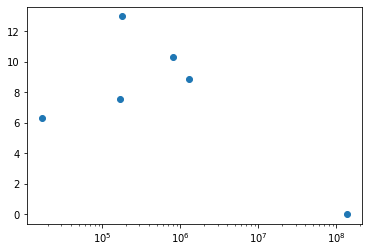

In [35]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(s,k)
ax.set_xscale('log') 

In [43]:
k = np.array(k)


In [55]:
s=s.reshape(-1, 1)

In [48]:
k=k.reshape(-1, 1)

array([[6.29585446e+00],
       [7.54195804e+00],
       [8.88326848e+00],
       [1.29696970e+01],
       [1.03217054e+01],
       [1.20805981e-04]])

In [56]:
s

array([[    17000],
       [   167000],
       [  1284000],
       [   181000],
       [   817000],
       [135000000]])

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [57]:
regressor = LinearRegression()
regressor.fit(s,k)


LinearRegression()

In [58]:
print(regressor.intercept_)
print(regressor.coef_)


9.234812376623713
[-6.83534116e-08]


In [59]:
KK=regressor.coef_*s+regressor.intercept_

In [64]:
KK

array([[9.23365037e+00],
       [9.22339736e+00],
       [9.14704660e+00],
       [9.22244041e+00],
       [9.17896764e+00],
       [7.10181498e-03]])

The relationship between adsorption/dosage and MW is adsorption/dosage=-6.8e-8MW+9.23

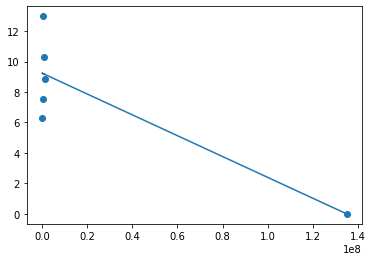

In [68]:
fig = plt.figure()
ax = plt.gca()
ax.plot(s,KK)
ax.scatter(s,k)